In [627]:
import cv2, torch
import sys
sys.path.append('../src')
from ImageToStringPreprocessing import ImageToStringPreprocessing
from ImageToStringNet import ImageToStringNet, classes as ImageToStringClasses

In [628]:
image_path = 'ciccio.png'
image_bgr = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

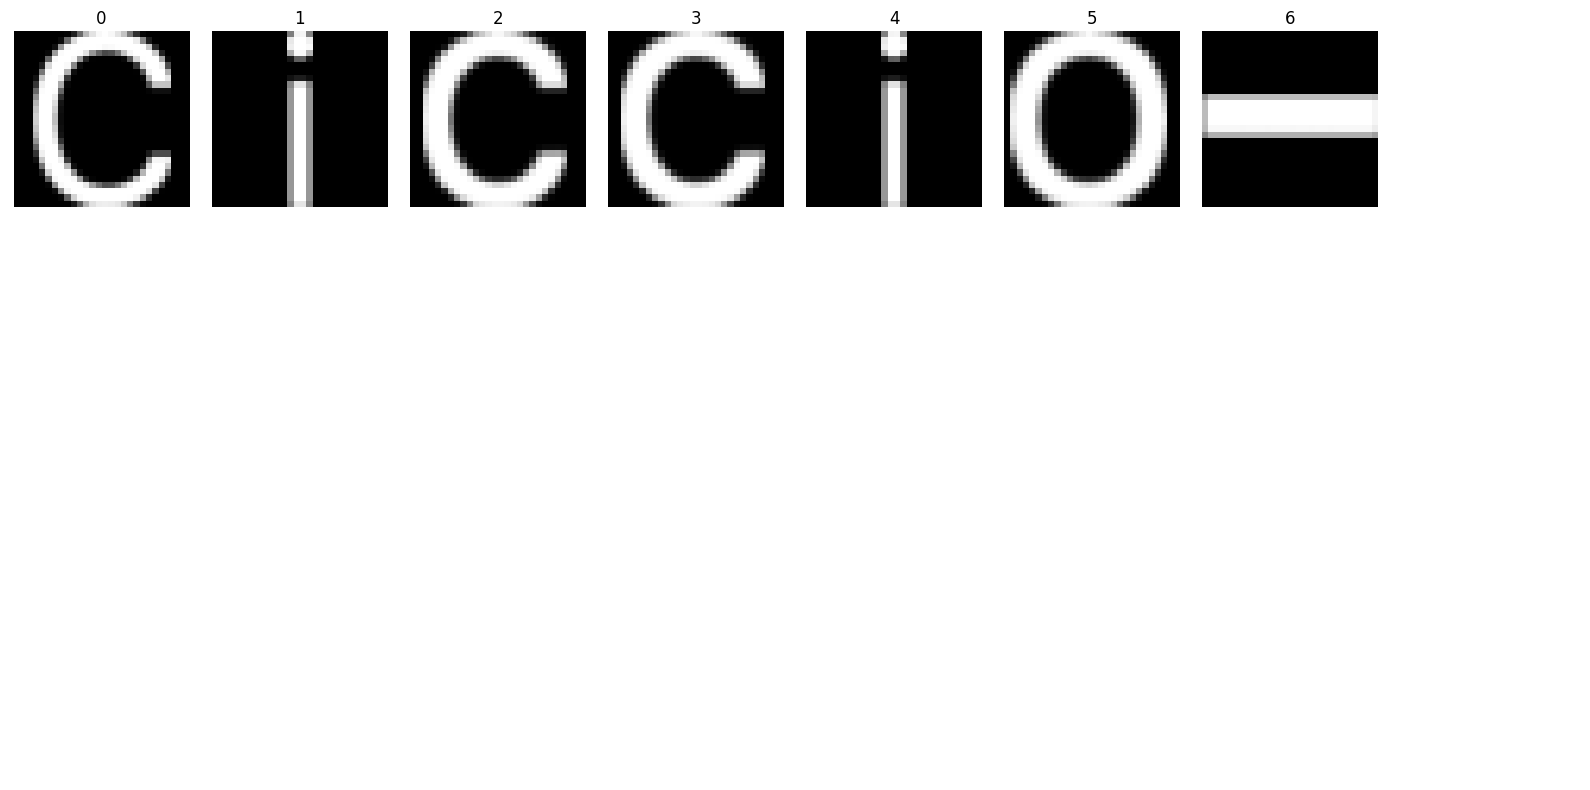

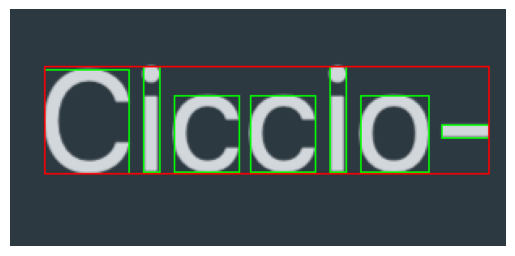

In [629]:
preprocessor = ImageToStringPreprocessing(image_rgb)

preprocessor.show_letters()
preprocessor.show_bboxed_image()

In [630]:
preprocessor.get_info()[0]

{'bboxes': (np.int32(21), np.int32(37), np.int32(52), np.int32(64)),
 'img': array([[  0,   0,   0,   0,   0,   0,   0,   0,   3,  33, 107, 184, 226,
         248, 254, 247, 227, 195, 122,  47,   6,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,  12, 107, 219, 254, 255, 255,
         255, 255, 255, 255, 255, 255, 236, 137,  29,   1,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,  17, 151, 247, 255, 255, 255, 255,
         254, 248, 250, 254, 255, 255, 255, 252, 200,  42,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   8, 154, 251, 255, 255, 253, 227, 150,
         101,  74,  80, 118, 196, 245, 255, 255, 255, 202,  37,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   1, 102, 249, 255, 255, 247, 152,  36,   1,
           0,   0,   0,   0,   8,  88, 216, 254, 255, 255, 169,  12,   0,
           0,   0],
        [  0,   0,   0,   0,  31, 216, 255, 255, 249, 136,  13,   0,   0,
          

In [631]:
preprocessor.get_info()[0]['img'].shape

(28, 28)

In [632]:
from torch import Tensor

In [633]:
class ImageToStringPostprocessing:
    def __init__(self):
        pass

    def add_spaces(str, info):
        return str

In [634]:
from ImageToStringClassifier import ImageToStringClassifier
classifier = ImageToStringClassifier(image_bgr)
classifier.get_string()

'Ciccio-'

In [635]:
#[(i, x['dist_top'], x['dist_bottom']) for i, x in enumerate(classifier.preprocessor.get_info())]

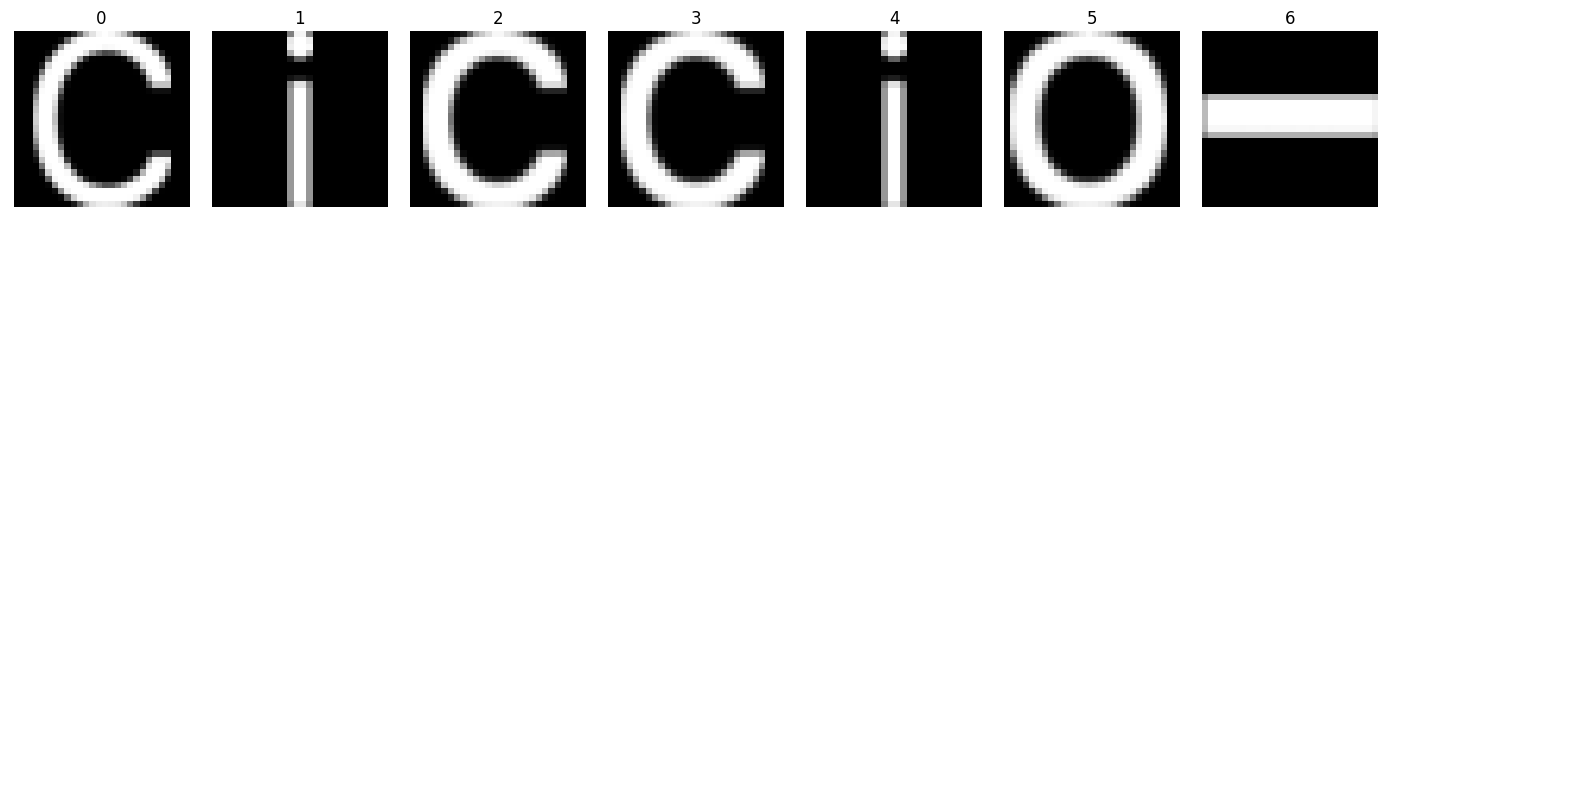

In [636]:
classifier.preprocessor.show_letters()

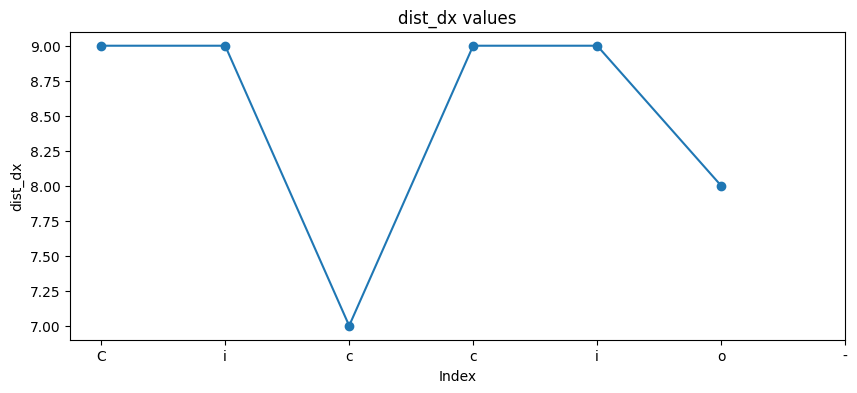

In [637]:
import matplotlib.pyplot as plt

dist_dx = [x['dist_dx'] for x in preprocessor.get_info() if x['dist_dx'] is not None]
labels = list(classifier._classify())
plt.figure(figsize=(10, 4))
plt.plot(dist_dx, marker='o')
plt.title('dist_dx values')
plt.xlabel('Index')
plt.ylabel('dist_dx')
plt.xticks(ticks=range(len(labels)), labels=labels)
plt.show()

In [638]:
car_conf = {'c', 'j', 'k', 'o', 'p', 's', 'u', 'v', 'w', 'x', 'z',
            'C', 'J', 'K', 'O', 'P', 'S', 'U', 'V', 'W', 'X', 'Z'}

# Ottieni la stringa dal classificatore
output_str = classifier.get_string()

# Filtra i caratteri
str_non_conf = ''.join([car for car in output_str if car not in car_conf])
str_conf = ''.join([car for car in output_str if car in car_conf])

print("Stringa:", output_str)
print("Lettere NON escluse:", str_non_conf)
print("Lettere escluse:", str_conf)

print(classifier.preprocessor.get_info()[0]['dist_top'])
print(classifier.preprocessor.get_info()[1]['dist_top'])



Stringa: Ciccio-
Lettere NON escluse: ii-
Lettere escluse: Ccco
3.0303030303030303
0.0


In [639]:
output_str = classifier.get_string()
output_str_nospace = output_str.replace(" ", "")

In [640]:
len(output_str_nospace)

7

In [641]:
#info_w_char = [{**x[0], 'char': x[1] } for x in zip(classifier.preprocessor.get_info(), output_str_nospace)]
info_w_char = [{**x[0], 'char': x[1], 'index': i} for i, x in enumerate(zip(classifier.preprocessor.get_info(), output_str_nospace))]


In [642]:
[x for x in info_w_char if x['char'] == 'i' and x['index'] == 1]

[{'bboxes': (np.int32(82), np.int32(35), np.int32(10), np.int32(65)),
  'img': array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 127,
          243, 245, 133,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 232,
          255, 255, 241,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 238,
          255, 255, 250,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 173,
          249, 249, 178,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  22,
           94,  98,  25,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0

In [ ]:
car_conf = {'c', 'j', 'k', 'o', 'p', 's', 'u', 'v', 'w', 'x', 'z',
            'C', 'J', 'K', 'O', 'P', 'S', 'U', 'V', 'W', 'X', 'Z'}

info_w_char_conf = [entry for entry in info_w_char if entry['char'] in car_conf]

print(output_str_nospace)
print("Caratteri confondibili trovati:", [e['char'] for e in info_w_char_conf])

first_valid_entry = next(
    (entry for entry in info_w_char if entry['char'] not in car_conf),
    None
)

if first_valid_entry:
    print("Primo carattere valido trovato:", first_valid_entry['char'])
else:
    print("Nessun carattere valido trovato.")

car_non_conf_maiusc = {'A', 'B', 'D', 'E', 'F', 'G', 'H', 'I', 'L', 'M', 'N', 'Q', 'R', 'T', 'Y'}
car_non_conf_minusc_b = {'g', 'm', 'y', 'o', 's', 'e', 'z', 'u', 'a', 'r', 'n', 'c', 'v', 'p', 'w', 'x', 'q'}
car_non_conf_minusc_a = {'t', 'i', 'd', 'f', 'h', 'j', 'k', 'l', 'b'}

import math
delta = 0.05

# aggiungere controlli che se first_valid_entry è None allora esci
if first_valid_entry['char'] in car_non_conf_maiusc:
    for entry in info_w_char_conf:
        if math.isclose(first_valid_entry['dist_top'], entry['dist_top'], abs_tol=delta):
            if entry['char'].islower():
                entry['char'] = entry['char'].upper()
        else:
            if entry['char'].isupper():
                entry['char'] = entry['char'].lower()
if first_valid_entry['char'] in car_non_conf_minusc_a:
    for entry in info_w_char_conf:
        if math.isclose(first_valid_entry['dist_top'], entry['dist_top'], abs_tol=delta):
            if entry['char'].islower():
                entry['char'] = entry['char'].upper()
        else:
            if entry['char'].isupper():
                entry['char'] = entry['char'].lower()

if first_valid_entry['char'] in car_non_conf_minusc_b:
    for entry in info_w_char_conf:
        if math.isclose(first_valid_entry['dist_top'], entry['dist_top'], abs_tol=delta):
            if entry['char'].isupper():
                entry['char'] = entry['char'].lower()
        else:
            if entry['char'].islower():
                entry['char'] = entry['char'].upper()

print("Caratteri confondibili dopo gli if:", [e['char'] for e in info_w_char_conf])

for entry1 in info_w_char:
    for entry2 in info_w_char_conf:
        if entry1['index'] == entry2['index']:
            if entry1['char'] != entry2['char']:
                entry1['char'] = entry2['char']

result_str = ''.join(entry['char'] for entry in info_w_char)
print(result_str)

Ciccio-
Caratteri confondibili trovati: ['C', 'c', 'c', 'o']
Primo carattere valido trovato: i
Caratteri confondibili dopo gli if: ['c', 'c', 'c', 'o']
ciccio-
